In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.ensemble import RandomForestClassifier
#from pandas_ml import ConfusionMatrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [2]:
from abc import ABC, abstractmethod 

In [3]:
class maneuver_classifier(ABC):
    @abstractmethod
    def __init__(self, dataframe):
        self.dataframe = dataframe
        pass
    
    def train_data(self): #Trains on the provided data set
        pass
    
    def predict_data(self): #Predicts and tell the accuracy of the trained algorithm
        pass
    
    def normalize_data(self): #Normalizes data based on the requirement
        pass

In [15]:
class SVM_algo(maneuver_classifier):
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.algo = None
    
    def train_data(self): #Trains on the provided data set
        X = np.array(self.dataframe[:, :-1])
        y = np.array(self.dataframe[:, -1])
        
        print(X.shape)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        
        # defining parameter range 
        param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'linear']} 
        
        grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 2)

        #grid.fit(X_train, y_train) 
        
        grid.fit(X, y) 
        
        
        self.algo = grid
        
        # print best parameter after tuning 
        print(grid.best_params_) 

        # print how our model looks after hyper-parameter tuning 
        print(grid.best_estimator_) 
        
        grid_predictions = grid.predict(X_test) 
        
        print(classification_report(y_test, grid_predictions)) 
        
        grid_confidence = grid.score(X_test, y_test)
        print(grid_confidence)
        
        cm = confusion_matrix(y_test, grid_predictions)
        
        print(cm)
        
        plot_confusion_matrix(grid, X_test, y_test)
        #cm.plot()
        
        plt.show()

        
        
        
    def predict_data(self, data): #Predicts and tell the accuracy of the trained algorithm
        data = self.ret_normalize_data(data)
        X = np.array(data[:, :-1])
        y = np.array(data[:, -1])
        
        print(X.shape)
        
        grid_predictions = self.algo.predict(X)
        print(classification_report(y, grid_predictions)) 
        
        for i in range(len(y)):
            print("Real: "+ y[i]+ " Predicted: " + grid_predictions[i] )
            
        
        
        grid_confidence = self.algo.score(X, y)
        print(grid_confidence)
        
        cm = confusion_matrix(y, grid_predictions)
        
        print(cm)
        
        plot_confusion_matrix(self.algo, X, y)
        #cm.plot()
        
        plt.show()
        
        
        pass
    
    def normalize_data(self): #Normalizes data based on the requirement
        df = self.dataframe.drop(['maneuver'], 1)
        result = df.copy()
        for feature_name in df.columns:
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        result = np.column_stack([result,self.dataframe['maneuver']])
        self.dataframe = result
        pass

    def ret_normalize_data(self, data): #Normalizes data based on the requirement
        data = data.dropna()
        df = data.drop(['maneuver'], 1)
        #df = df.fillna(0)
        result = df.copy()
        for feature_name in df.columns:
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        result = np.column_stack([result,data['maneuver']])
        return result
        pass



In [8]:
train_acc_3 = pd.read_excel("bm_3_processed.xlsx", "Acclerometer")
train_gyro_3 = pd.read_excel("bm_3_processed.xlsx", "Gyroscope")
train_com_3 = pd.read_excel("bm_3_processed.xlsx", "Combined")
train_gyz_3 = pd.read_excel("bm_3_processed.xlsx", "Gyroscope_z")


train_acc_4 = pd.read_excel("bm_4_processed.xlsx", "Acclerometer")
train_gyro_4 = pd.read_excel("bm_4_processed.xlsx", "Gyroscope")
train_com_4 = pd.read_excel("bm_4_processed.xlsx", "Combined")
train_gyz_4 = pd.read_excel("bm_4_processed.xlsx", "Gyroscope_z")

train_acc_5 = pd.read_excel("bm_5_processed.xlsx", "Acclerometer")
train_gyro_5 = pd.read_excel("bm_5_processed.xlsx", "Gyroscope")
train_com_5 = pd.read_excel("bm_5_processed.xlsx", "Combined")
train_gyz_5 = pd.read_excel("bm_5_processed.xlsx", "Gyroscope_z")

train_acc_6 = pd.read_excel("bm_6_processed.xlsx", "Acclerometer")
train_gyro_6 = pd.read_excel("bm_6_processed.xlsx", "Gyroscope")
train_com_6 = pd.read_excel("bm_6_processed.xlsx", "Combined")
train_gyz_6 = pd.read_excel("bm_6_processed.xlsx", "Gyroscope_z")


In [9]:
for i in range(3):
    train_acc_3 = train_acc_3.drop(train_acc_3.columns[0], axis=1)
    train_acc_4 = train_acc_4.drop(train_acc_4.columns[0], axis=1)
    train_acc_5 = train_acc_5.drop(train_acc_5.columns[0], axis=1)
    train_acc_6 = train_acc_6.drop(train_acc_6.columns[0], axis=1)
    
    train_gyro_3 = train_gyro_3.drop(train_gyro_3.columns[0], axis = 1)
    train_gyro_4 = train_gyro_4.drop(train_gyro_4.columns[0], axis = 1)
    train_gyro_5 = train_gyro_5.drop(train_gyro_5.columns[0], axis = 1)
    train_gyro_6 = train_gyro_6.drop(train_gyro_6.columns[0], axis = 1)
    
    train_com_3 = train_com_3.drop(train_com_3.columns[0], axis = 1)
    train_com_4 = train_com_4.drop(train_com_4.columns[0], axis = 1)
    train_com_5 = train_com_5.drop(train_com_5.columns[0], axis = 1)
    train_com_6 = train_com_6.drop(train_com_6.columns[0], axis = 1)
    
    train_gyz_3 = train_gyz_3.drop(train_gyz_3.columns[0], axis = 1)
    train_gyz_4 = train_gyz_4.drop(train_gyz_4.columns[0], axis = 1)
    train_gyz_5 = train_gyz_5.drop(train_gyz_5.columns[0], axis = 1)
    train_gyz_6 = train_gyz_6.drop(train_gyz_6.columns[0], axis = 1)
    

    
    

(2701, 33)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\Users\talha.javed\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  2.6min finished


{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
                              precision    recall  f1-score   support

    Aggressive left 180-turn       0.56      0.17      0.26        29
     Aggressive left 45-turn       0.86      0.48      0.62        25
     Aggressive left 90-turn       0.67      0.71      0.69       113
 Aggressive left lane change       0.67      0.72      0.70       215
   Aggressive right 180-turn       0.00      0.00      0.00         1
    Aggressive right 45-turn       1.00      0.12      0.22        40
    Aggressive right 90-turn       0.74      0.87      0.80       154
Aggressive right lane change       0.70      0.75      0.72       234

                    accuracy                           0.70       811
        

C:\Users\talha.javed\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


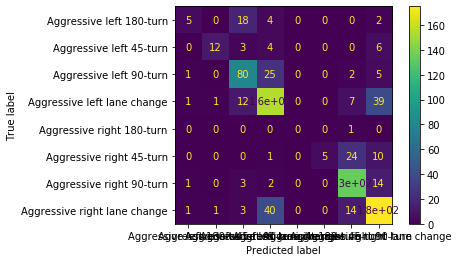

In [16]:
alg_acc_3 = SVM_algo(train_acc_3)
alg_acc_3.normalize_data()
alg_acc_3.train_data()


(2699, 33)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\Users\talha.javed\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  1.9min finished


{'C': 1000, 'gamma': 1, 'kernel': 'linear'}
SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
                              precision    recall  f1-score   support

    Aggressive left 180-turn       0.00      0.00      0.00        29
     Aggressive left 45-turn       0.91      0.37      0.53        27
     Aggressive left 90-turn       0.65      0.78      0.71       100
 Aggressive left lane change       0.65      0.67      0.66       223
    Aggressive right 45-turn       0.80      0.13      0.22        31
    Aggressive right 90-turn       0.87      0.87      0.87       149
Aggressive right lane change       0.66      0.78      0.71       251

                    accuracy                           0.70       810
                   macro avg       0.65      0.51      0.53       810
      

C:\Users\talha.javed\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


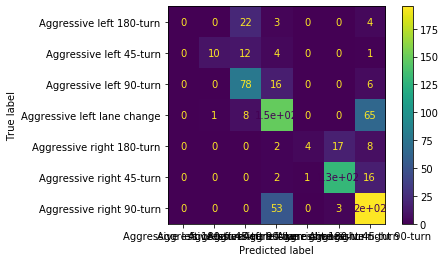

In [17]:
alg_gyro_3 = SVM_algo(train_gyro_3)
alg_gyro_3.normalize_data()
alg_gyro_3.train_data()


(2699, 66)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\Users\talha.javed\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  3.5min finished


{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
                              precision    recall  f1-score   support

    Aggressive left 180-turn       0.93      0.45      0.61        31
     Aggressive left 45-turn       0.93      0.59      0.72        22
     Aggressive left 90-turn       0.75      0.78      0.77        96
 Aggressive left lane change       0.74      0.71      0.73       249
   Aggressive right 180-turn       1.00      1.00      1.00         2
    Aggressive right 45-turn       0.93      0.48      0.63        27
    Aggressive right 90-turn       0.89      0.86      0.87       147
Aggressive right lane change       0.68      0.81      0.74       236

                    accuracy                           0.76       810
          

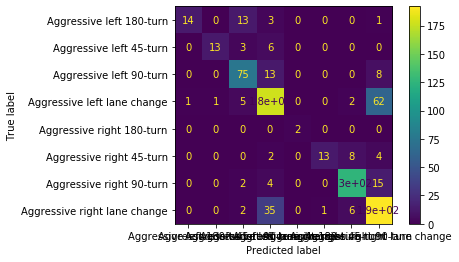

In [18]:
alg_com_3 = SVM_algo(train_com_3)
alg_com_3.normalize_data()
alg_com_3.train_data()


(2699, 11)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\Users\talha.javed\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  1.0min finished


{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
                              precision    recall  f1-score   support

    Aggressive left 180-turn       1.00      0.17      0.29        29
     Aggressive left 45-turn       1.00      0.25      0.40        20
     Aggressive left 90-turn       0.76      0.75      0.76       110
 Aggressive left lane change       0.63      0.72      0.67       208
   Aggressive right 180-turn       1.00      0.50      0.67         2
    Aggressive right 45-turn       0.71      0.12      0.21        40
    Aggressive right 90-turn       0.84      0.86      0.85       153
Aggressive right lane change       0.70      0.81      0.75       248

                    accuracy                           0.72       810
            

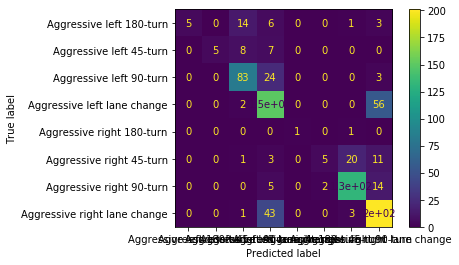

In [19]:
alg_gyz_3 = SVM_algo(train_gyz_3)
alg_gyz_3.normalize_data()
alg_gyz_3.train_data()


(3576, 45)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\Users\talha.javed\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  4.9min finished


{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
                              precision    recall  f1-score   support

    Aggressive left 180-turn       0.60      0.28      0.38        32
     Aggressive left 45-turn       1.00      0.35      0.51        26
     Aggressive left 90-turn       0.68      0.70      0.69       146
 Aggressive left lane change       0.67      0.71      0.69       305
   Aggressive right 180-turn       0.00      0.00      0.00         2
    Aggressive right 45-turn       1.00      0.08      0.15        37
    Aggressive right 90-turn       0.79      0.84      0.81       189
Aggressive right lane change       0.67      0.74      0.70       336

                    accuracy                           0.70      1073
          

C:\Users\talha.javed\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6952469711090401
[[  9   0  15   4   0   0   0   4]
 [  0   9   3   7   0   0   0   7]
 [  1   0 102  27   0   0   3  13]
 [  2   0  15 217   0   0   3  68]
 [  0   0   0   1   0   0   1   0]
 [  0   0   0   4   0   3  19  11]
 [  1   0   4   5   0   0 158  21]
 [  2   0  11  60   0   0  15 248]]


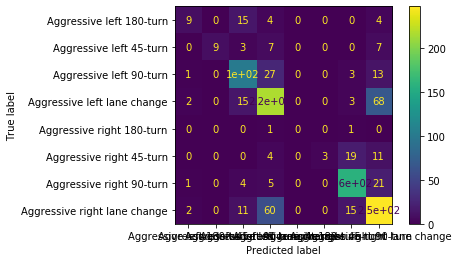

In [20]:
alg_acc_4 = SVM_algo(train_acc_4)
alg_acc_4.normalize_data()
alg_acc_4.train_data()


(3573, 45)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\Users\talha.javed\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  3.6min finished


{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
                              precision    recall  f1-score   support

    Aggressive left 180-turn       0.96      0.48      0.64        46
     Aggressive left 45-turn       0.88      0.50      0.64        28
     Aggressive left 90-turn       0.79      0.82      0.81       142
 Aggressive left lane change       0.73      0.69      0.71       305
   Aggressive right 180-turn       1.00      1.00      1.00         1
    Aggressive right 45-turn       0.78      0.35      0.48        40
    Aggressive right 90-turn       0.87      0.90      0.89       186
Aggressive right lane change       0.69      0.83      0.76       324

                    accuracy                           0.76      1072
        

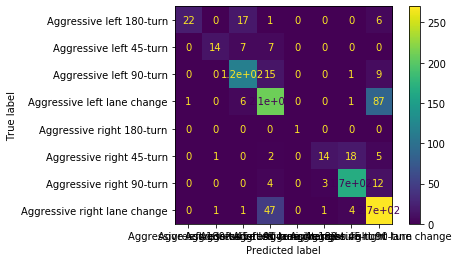

In [21]:
alg_gyro_4 = SVM_algo(train_gyro_4)
alg_gyro_4.normalize_data()
alg_gyro_4.train_data()


(3573, 90)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\Users\talha.javed\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.8s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.8s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.9s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  6.9min finished


{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
                              precision    recall  f1-score   support

    Aggressive left 180-turn       0.94      0.42      0.59        40
     Aggressive left 45-turn       0.94      0.70      0.80        23
     Aggressive left 90-turn       0.78      0.78      0.78       130
 Aggressive left lane change       0.74      0.72      0.73       305
    Aggressive right 45-turn       0.92      0.45      0.61        53
    Aggressive right 90-turn       0.88      0.87      0.88       192
Aggressive right lane change       0.70      0.83      0.76       329

                    accuracy                           0.77      1072
                   macro avg       0.84      0.68      0.73      1072
          

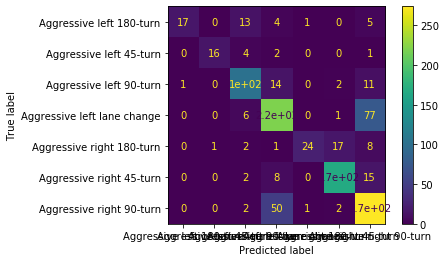

In [22]:
alg_com_4 = SVM_algo(train_com_4)
alg_com_4.normalize_data()
alg_com_4.train_data()


(3573, 15)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\Users\talha.javed\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  1.8min finished


{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
                              precision    recall  f1-score   support

    Aggressive left 180-turn       0.83      0.19      0.31        26
     Aggressive left 45-turn       0.77      0.43      0.56        23
     Aggressive left 90-turn       0.77      0.80      0.79       153
 Aggressive left lane change       0.70      0.66      0.68       299
   Aggressive right 180-turn       1.00      1.00      1.00         2
    Aggressive right 45-turn       0.84      0.33      0.48        48
    Aggressive right 90-turn       0.85      0.88      0.86       182
Aggressive right lane change       0.68      0.81      0.74       339

                    accuracy                           0.74      1072
            

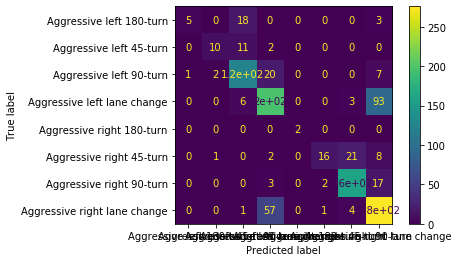

In [23]:
alg_gyz_4 = SVM_algo(train_gyz_4)
alg_gyz_4.normalize_data()
alg_gyz_4.train_data()


(4428, 57)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.9s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   1.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   1.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  7.9min finished


{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


C:\Users\talha.javed\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                              precision    recall  f1-score   support

    Aggressive left 180-turn       0.85      0.64      0.73        44
     Aggressive left 45-turn       1.00      0.46      0.63        24
     Aggressive left 90-turn       0.83      0.82      0.82       180
 Aggressive left lane change       0.76      0.76      0.76       361
   Aggressive right 180-turn       0.00      0.00      0.00         2
    Aggressive right 45-turn       0.96      0.41      0.57        54
    Aggressive right 90-turn       0.87      0.90      0.88       238
Aggressive right lane change       0.75      0.85      0.79       426

                    accuracy                           0.79      1329
                   macro avg       0.75      0.60      0.65      1329
                weighted avg       0.80      0.79      0.79      1329

0.7938299473288186
[[ 28   0   8   3   0   0   0   5]
 [  0  11   4   4   0   0   0   5]
 [  3   0 147  13   0   0   6  11]
 [  1   0  11 273   0   0   2  74

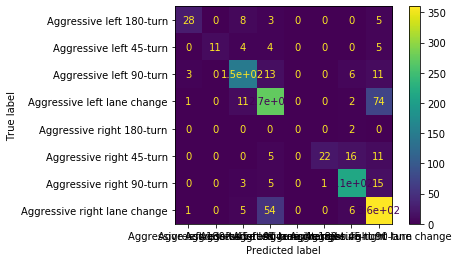

In [24]:
alg_acc_5 = SVM_algo(train_acc_5)
alg_acc_5.normalize_data()
alg_acc_5.train_data()


(4424, 57)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.8s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.8s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.8s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  6.0min finished


{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
                              precision    recall  f1-score   support

    Aggressive left 180-turn       1.00      0.63      0.77        35
     Aggressive left 45-turn       0.96      0.67      0.79        36
     Aggressive left 90-turn       0.88      0.90      0.89       177
 Aggressive left lane change       0.73      0.66      0.69       358
   Aggressive right 180-turn       1.00      1.00      1.00         2
    Aggressive right 45-turn       0.88      0.51      0.65        59
    Aggressive right 90-turn       0.89      0.94      0.91       251
Aggressive right lane change       0.70      0.82      0.76       410

                    accuracy                           0.79      1328
        

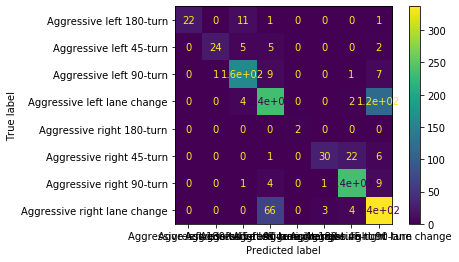

In [25]:
alg_gyro_5 = SVM_algo(train_gyro_5)
alg_gyro_5.normalize_data()
alg_gyro_5.train_data()


(4424, 114)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   2.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   2.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   2.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   2.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   2.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   1.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   1.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   1.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 12.8min finished


{'C': 1000, 'gamma': 1, 'kernel': 'linear'}
SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
                              precision    recall  f1-score   support

    Aggressive left 180-turn       0.82      0.72      0.77        46
     Aggressive left 45-turn       0.88      0.68      0.77        34
     Aggressive left 90-turn       0.82      0.86      0.84       175
 Aggressive left lane change       0.72      0.66      0.69       399
    Aggressive right 45-turn       0.81      0.45      0.58        66
    Aggressive right 90-turn       0.86      0.88      0.87       210
Aggressive right lane change       0.67      0.78      0.72       398

                    accuracy                           0.75      1328
                   macro avg       0.80      0.72      0.75      1328
      

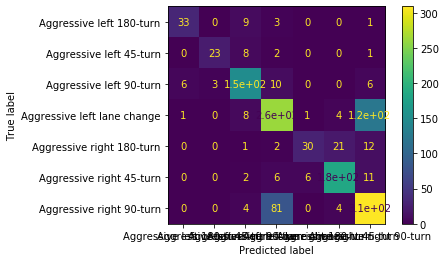

In [26]:
alg_com_5 = SVM_algo(train_com_5)
alg_com_5.normalize_data()
alg_com_5.train_data()


(4424, 19)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  2.8min finished


{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
                              precision    recall  f1-score   support

    Aggressive left 180-turn       1.00      0.11      0.20        37
     Aggressive left 45-turn       0.94      0.53      0.68        32
     Aggressive left 90-turn       0.75      0.80      0.77       153
 Aggressive left lane change       0.64      0.60      0.62       397
   Aggressive right 180-turn       1.00      1.00      1.00         1
    Aggressive right 45-turn       1.00      0.30      0.46        50
    Aggressive right 90-turn       0.88      0.86      0.87       248
Aggressive right lane change       0.61      0.76      0.68       410

                    accuracy                           0.70      1328
              

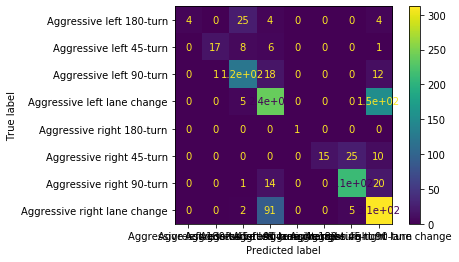

In [27]:
alg_gyz_5 = SVM_algo(train_gyz_5)
alg_gyz_5.normalize_data()
alg_gyz_5.train_data()


(5253, 69)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   1.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   1.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   1.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 11.7min finished


{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
                              precision    recall  f1-score   support

    Aggressive left 180-turn       0.88      0.81      0.84        53
     Aggressive left 45-turn       0.95      0.62      0.75        34
     Aggressive left 90-turn       0.85      0.81      0.83       211
 Aggressive left lane change       0.74      0.74      0.74       469
   Aggressive right 180-turn       1.00      1.00      1.00         3
    Aggressive right 45-turn       0.97      0.50      0.66        62
    Aggressive right 90-turn       0.86      0.89      0.88       264
Aggressive right lane change       0.73      0.80      0.76       480

                    accuracy                           0.78      1576
        

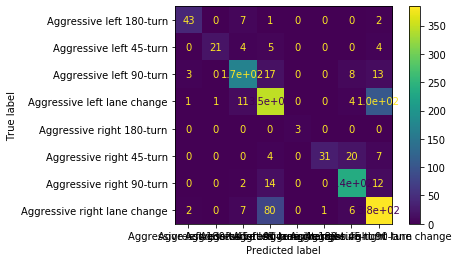

In [28]:
alg_acc_6 = SVM_algo(train_acc_6)
alg_acc_6.normalize_data()
alg_acc_6.train_data()


(5248, 69)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   1.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   1.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   1.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  8.9min finished


{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
                              precision    recall  f1-score   support

    Aggressive left 180-turn       0.87      0.51      0.65        39
     Aggressive left 45-turn       0.86      0.76      0.81        33
     Aggressive left 90-turn       0.88      0.89      0.89       222
 Aggressive left lane change       0.74      0.66      0.70       430
   Aggressive right 180-turn       1.00      1.00      1.00         2
    Aggressive right 45-turn       0.90      0.70      0.79        61
    Aggressive right 90-turn       0.94      0.93      0.93       267
Aggressive right lane change       0.72      0.84      0.78       521

                    accuracy                           0.80      1575
        

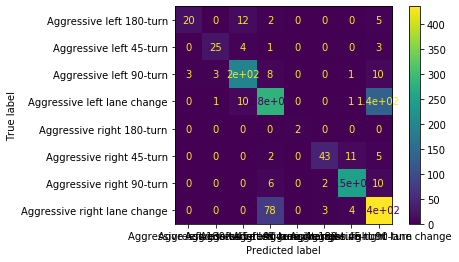

In [29]:
alg_gyro_6 = SVM_algo(train_gyro_6)
alg_gyro_6.normalize_data()
alg_gyro_6.train_data()


(5248, 138)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   3.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   3.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   3.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   5.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   7.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=  30.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   3.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   3.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 24.9min finished


{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
                              precision    recall  f1-score   support

    Aggressive left 180-turn       1.00      0.67      0.80        51
     Aggressive left 45-turn       0.90      0.78      0.84        23
     Aggressive left 90-turn       0.89      0.90      0.89       202
 Aggressive left lane change       0.80      0.72      0.76       426
   Aggressive right 180-turn       1.00      1.00      1.00         2
    Aggressive right 45-turn       0.97      0.77      0.86        77
    Aggressive right 90-turn       0.95      0.91      0.93       274
Aggressive right lane change       0.76      0.88      0.82       520

                    accuracy                           0.83      1575
          

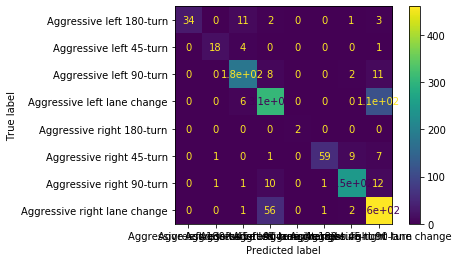

In [30]:
alg_com_6 = SVM_algo(train_com_6)
alg_com_6.normalize_data()
alg_com_6.train_data()


(5248, 23)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  3.9min finished


{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
                              precision    recall  f1-score   support

    Aggressive left 180-turn       0.94      0.33      0.49        48
     Aggressive left 45-turn       0.89      0.52      0.65        33
     Aggressive left 90-turn       0.82      0.83      0.83       212
 Aggressive left lane change       0.72      0.63      0.67       446
    Aggressive right 45-turn       0.88      0.39      0.54        72
    Aggressive right 90-turn       0.87      0.93      0.90       290
Aggressive right lane change       0.65      0.81      0.72       474

                    accuracy                           0.74      1575
                   macro avg       0.82      0.63      0.69      1575
            

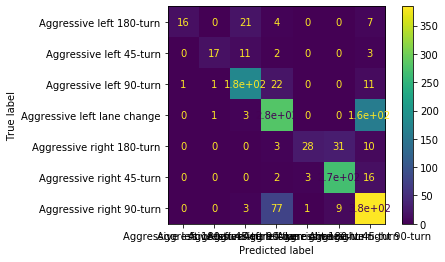

In [31]:
alg_gyz_6 = SVM_algo(train_gyz_6)
alg_gyz_6.normalize_data()
alg_gyz_6.train_data()
